In [3]:
import tensorflow as tf
import os

def download_model(model_type):
    server_prefix = 'https://omnomnom.vision.rwth-aachen.de/data/metrabs'
    model_zippath = tf.keras.utils.get_file(
        origin=f'{server_prefix}/{model_type}_20211019.zip',
        extract=True, cache_subdir='models')
    model_path = os.path.join(os.path.dirname(model_zippath), model_type)
    return model_path

model = tf.saved_model.load(download_model('metrabs_mob3l_y4t')) # or metrabs_eff2l_y4 for the big model
! wget -q https://raw.githubusercontent.com/isarandi/metrabs/master/img/test_image_3dpw.jpg


'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [1]:
import cv2
image = cv2.imread('C:/Users/Leeyourack/jookyoung/image/1.test_image/doctor.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [4]:
pred = model.detect_poses(image, skeleton='smpl_24')

In [5]:
pred

{'boxes': <tf.Tensor: shape=(12, 5), dtype=float32, numpy=
 array([[8.00264709e+02, 2.16572632e+02, 1.49769989e+02, 3.99826599e+02,
         9.20519531e-01],
        [3.02254913e+02, 2.18973877e+02, 7.78717957e+01, 3.28768768e+02,
         9.16059792e-01],
        [3.78674042e+02, 2.19853790e+02, 8.21386490e+01, 3.14480225e+02,
         9.15254653e-01],
        [7.11026917e+02, 2.41297546e+02, 1.12987762e+02, 3.55861359e+02,
         8.51001501e-01],
        [1.65654053e+02, 2.24376083e+02, 7.86455917e+01, 3.13713348e+02,
         8.18551660e-01],
        [2.30627747e+02, 2.08549332e+02, 7.99084549e+01, 3.40366394e+02,
         8.07252407e-01],
        [9.97458725e+01, 2.36134964e+02, 7.40839081e+01, 3.01547913e+02,
         8.06825578e-01],
        [4.52026825e+02, 2.29841736e+02, 7.68659821e+01, 3.07645599e+02,
         7.97710896e-01],
        [5.78948669e+02, 2.13059402e+02, 1.13568489e+02, 3.30244751e+02,
         7.93404460e-01],
        [8.99991131e+00, 2.42936554e+02, 1.0818277

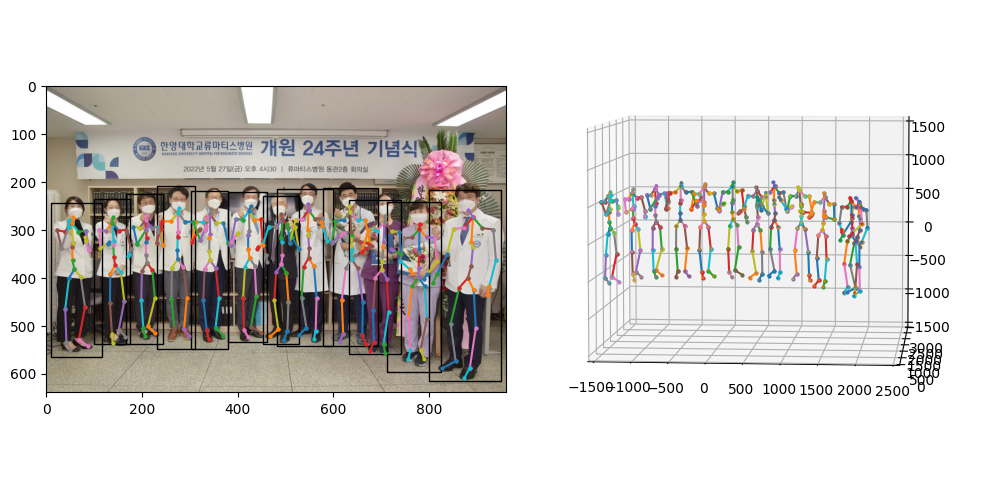

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D

def visualize(im, detections, poses3d, poses2d, edges):
    fig = plt.figure(figsize=(10, 5.2))
    image_ax = fig.add_subplot(1, 2, 1)
    image_ax.imshow(image)
    for x, y, w, h in detections[:, :4]:
        image_ax.add_patch(Rectangle((x, y), w, h, fill=False))

    pose_ax = fig.add_subplot(1, 2, 2, projection='3d')
    pose_ax.view_init(5, -85)
    pose_ax.set_xlim3d(-1500, 2500)
    pose_ax.set_zlim3d(-1500, 1500)
    pose_ax.set_ylim3d(0, 3000)

    # Matplotlib plots the Z axis as vertical, but our poses have Y as the vertical axis.
    # Therefore, we do a 90° rotation around the X axis:
    poses3d[..., 1], poses3d[..., 2] = poses3d[..., 2], -poses3d[..., 1]
    for pose3d, pose2d in zip(poses3d, poses2d):
        for i_start, i_end in edges:
            image_ax.plot(*zip(pose2d[i_start], pose2d[i_end]), marker='o', markersize=2)
            pose_ax.plot(*zip(pose3d[i_start], pose3d[i_end]), marker='o', markersize=2)
        image_ax.scatter(*pose2d.T, s=2)
        pose_ax.scatter(*pose3d.T, s=2)

    fig.tight_layout()
    plt.show()

visualize(
    image, 
    pred['boxes'].numpy(),
    pred['poses3d'].numpy(),
    pred['poses2d'].numpy(),
    model.per_skeleton_joint_edges['smpl_24'].numpy())

In [20]:
a= 9.2023718e-01
a

0.92023718